**Постройте модель LASSO регрессии для атрибутов
X ={SkinThickness, BMI} и Y = {Insulin} из датасета - diabetes.csv. Укажите score модели** 

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Загрузка данных из файла csv
data = pd.read_csv("diabetes.csv")

# Выбор необходимых атрибутов для X и Y
X = data[["SkinThickness", "BMI"]]
Y = data["Insulin"]

# Разделение данных на тренировочную и тестовую выборки (25% данных для тестирования)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Создание и обучение Lasso-регрессии
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train.values, Y_train.values)  

# Предсказание результатов для тестовых данных
Y_pred = lasso_regression.predict(X_test.values)


# Вычисление score для Lasso-регрессии
lasso_score = r2_score(Y_test, Y_pred)

print(f"Lasso Regression score: {lasso_score}")

Lasso Regression score: 0.23555039396247668


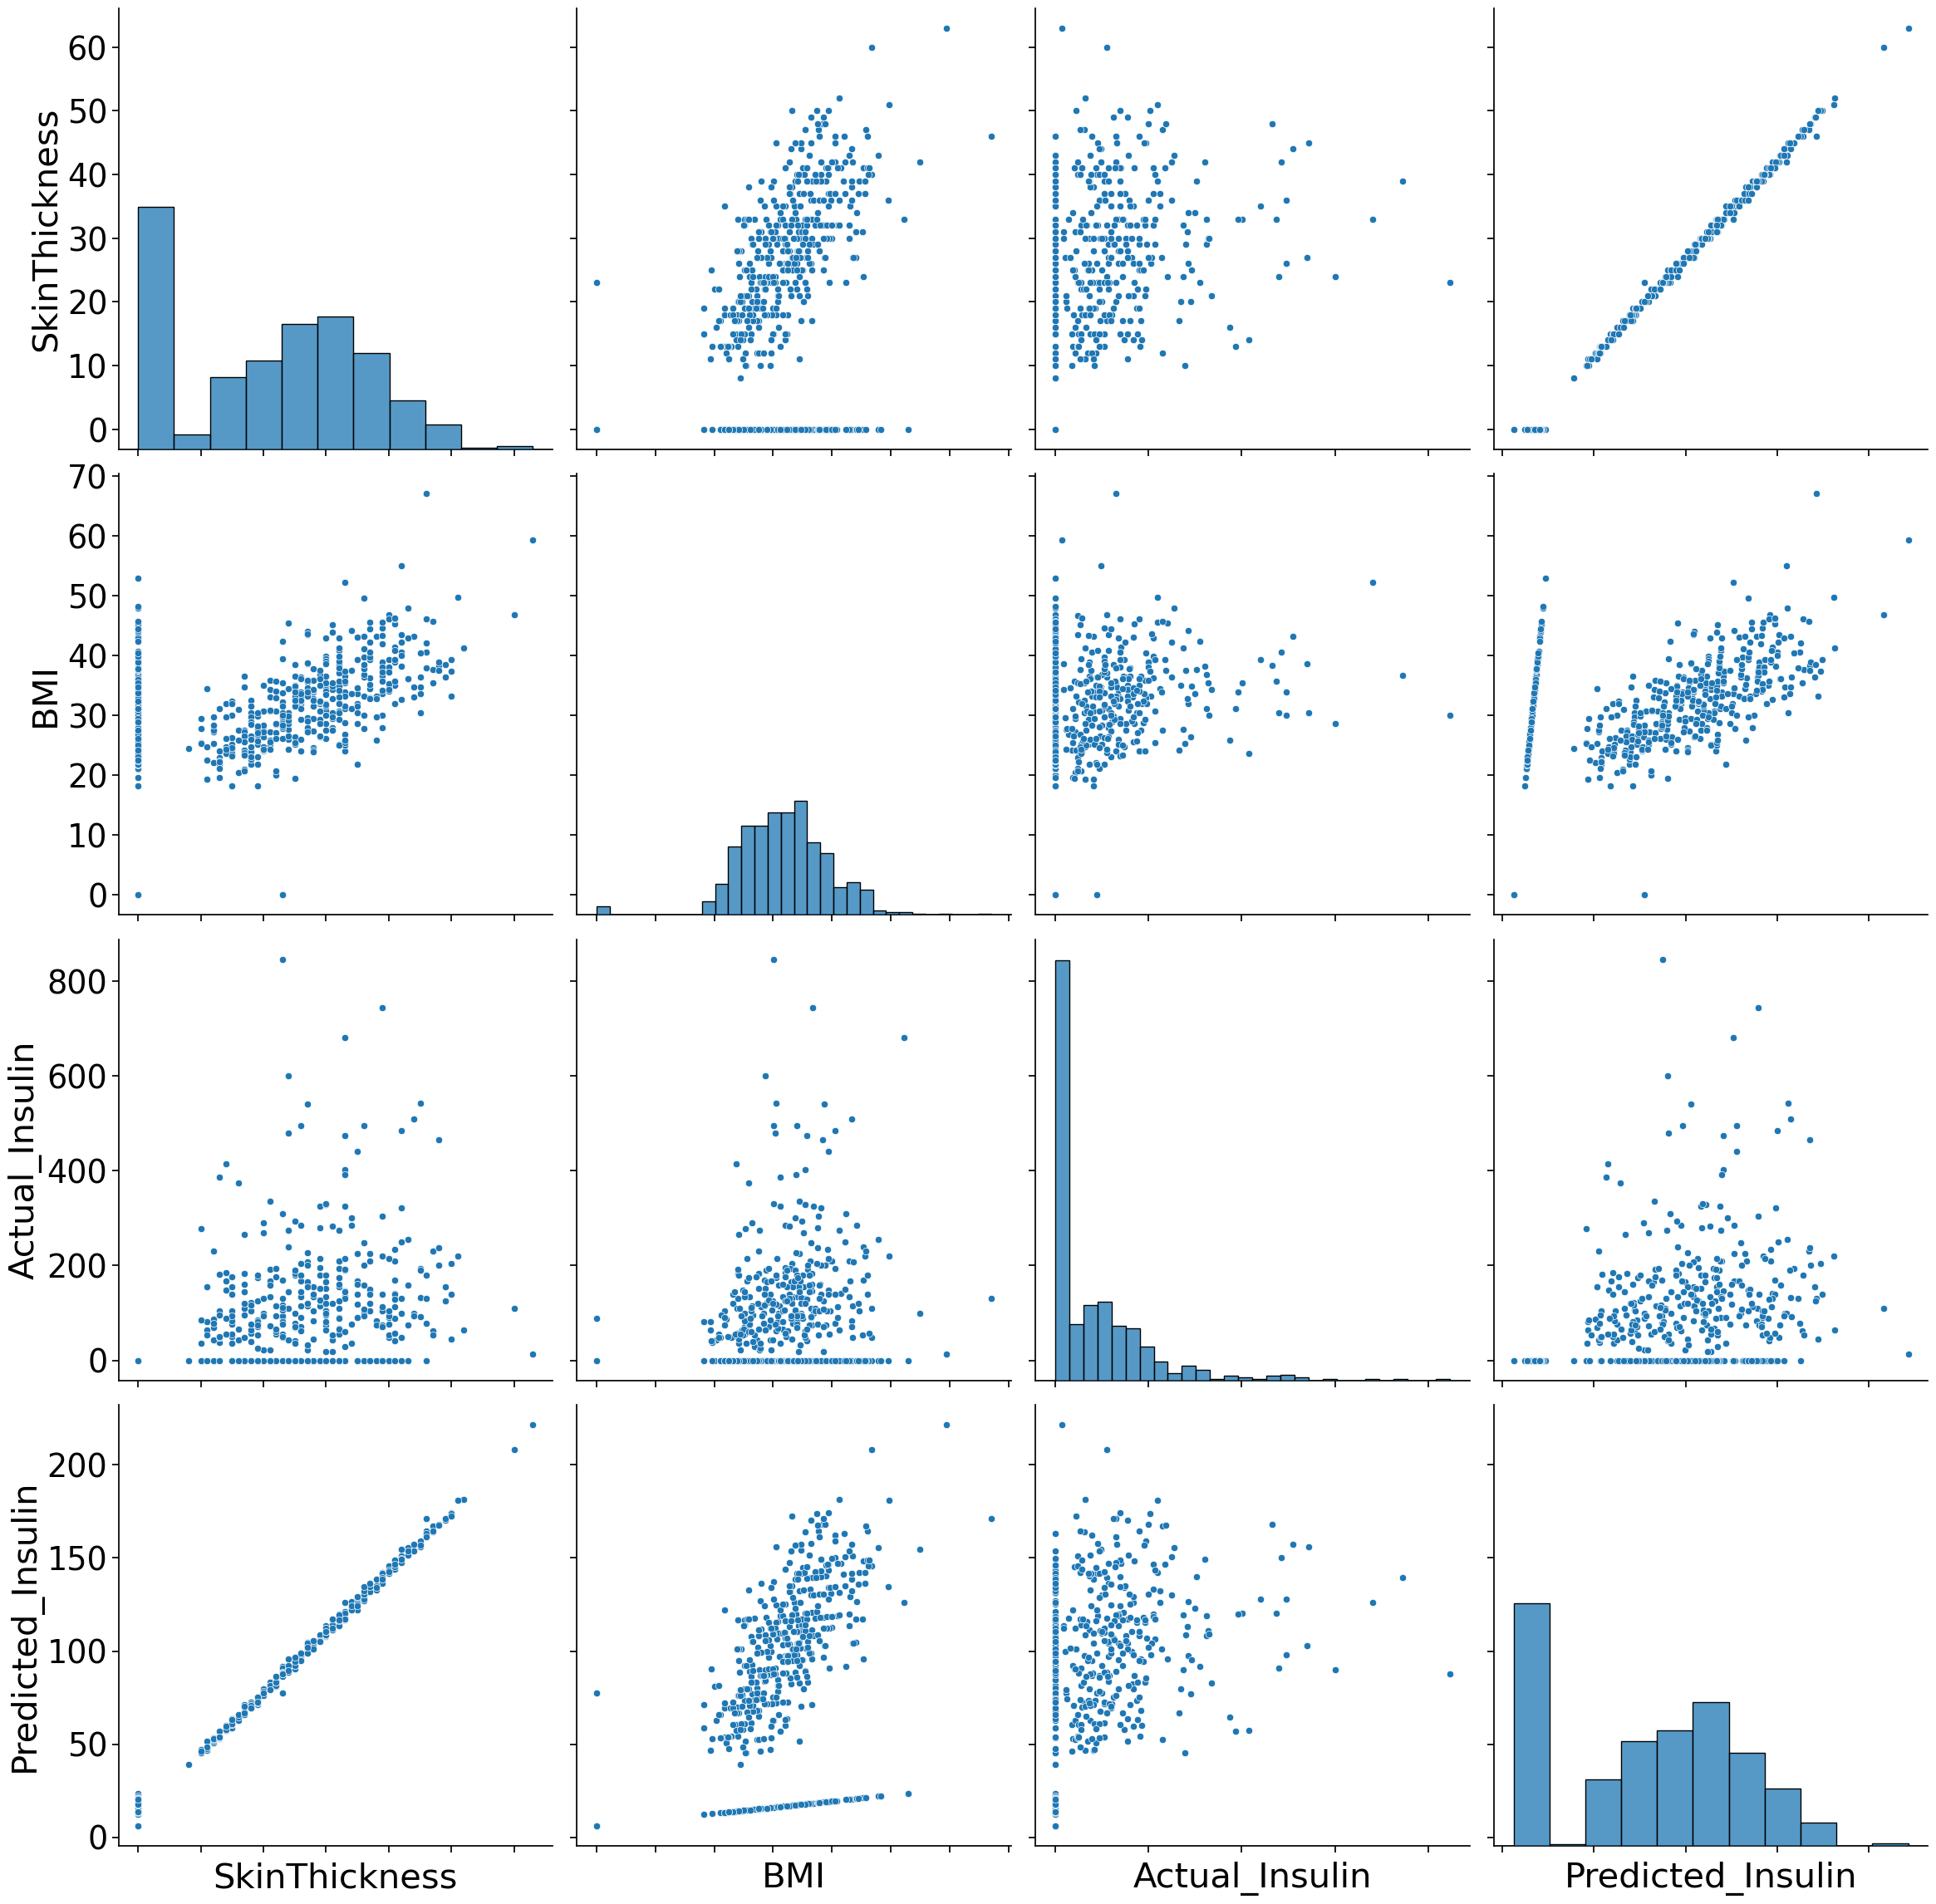

In [57]:
# Добавление предсказанных значений Insulin на основе SkinThickness и BMI
X_pred = np.array(X_train, dtype=float)
Y_pred = lasso_regression.predict(X_pred)

# Создание нового DataFrame с фактическими и предсказанными значениями Insulin
scatter_data = X_train.copy()
scatter_data["Actual_Insulin"] = Y_train
scatter_data["Predicted_Insulin"] = Y_pred

# Создание матрицы рассеяния
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(scatter_data[["SkinThickness", "BMI", "Actual_Insulin", "Predicted_Insulin"]], 
                     palette="tab20", height=6)
    g.set(xticklabels=[])

plt.show()

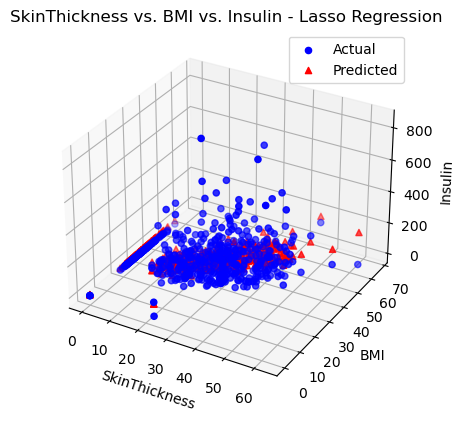

In [58]:
# Настройка маркеров и цветов для фактических и предсказанных данных
markers = {"Actual": "o", "Predicted": "^"}
colors = {"Actual": "blue", "Predicted": "red"}

# Построение 3D-графика для Lasso-регрессии
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Actual_Insulin"], 
           c=colors["Actual"], marker=markers["Actual"], label="Actual")
ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Predicted_Insulin"], 
           c=colors["Predicted"], marker=markers["Predicted"], label="Predicted")

ax.set_xlabel("SkinThickness")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("SkinThickness vs. BMI vs. Insulin - Lasso Regression")
ax.legend()
plt.show()

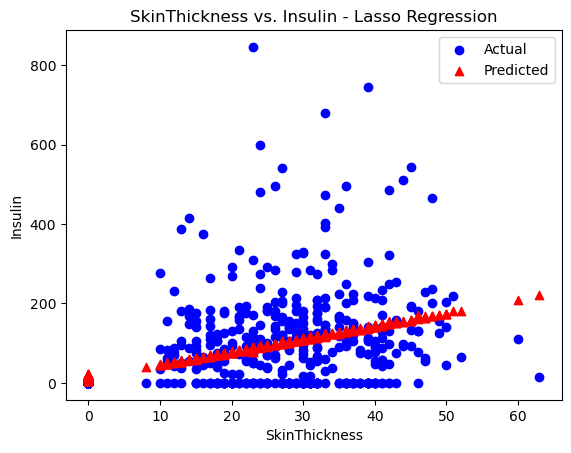

In [59]:
# Построение 2D-графика для Lasso-регрессии
plt.scatter(scatter_data["SkinThickness"], scatter_data["Actual_Insulin"], 
            c=colors["Actual"], marker=markers["Actual"], label="Actual")
plt.scatter(scatter_data["SkinThickness"], scatter_data["Predicted_Insulin"], 
            c=colors["Predicted"], marker=markers["Predicted"], label="Predicted")

plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.title("SkinThickness vs. Insulin - Lasso Regression")
plt.legend()
plt.show()

**Постройте модель Ridge регрессии для атрибутов X ={SkinThickness, BMI} и Y = {Insulin} из датасета - diabetes.csv. Укажите score модели**

In [60]:
from sklearn.linear_model import Ridge

# Создание и обучение Ridge-регрессии
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train.values, Y_train.values)

# Предсказание результатов для тестовых данных
Y_pred_ridge = ridge_regression.predict(X_test.values)

# Вычисление score для Ridge-регрессии
ridge_score = r2_score(Y_test, Y_pred_ridge)

print(f"Ridge Regression score: {ridge_score}")

Ridge Regression score: 0.23559645199192447


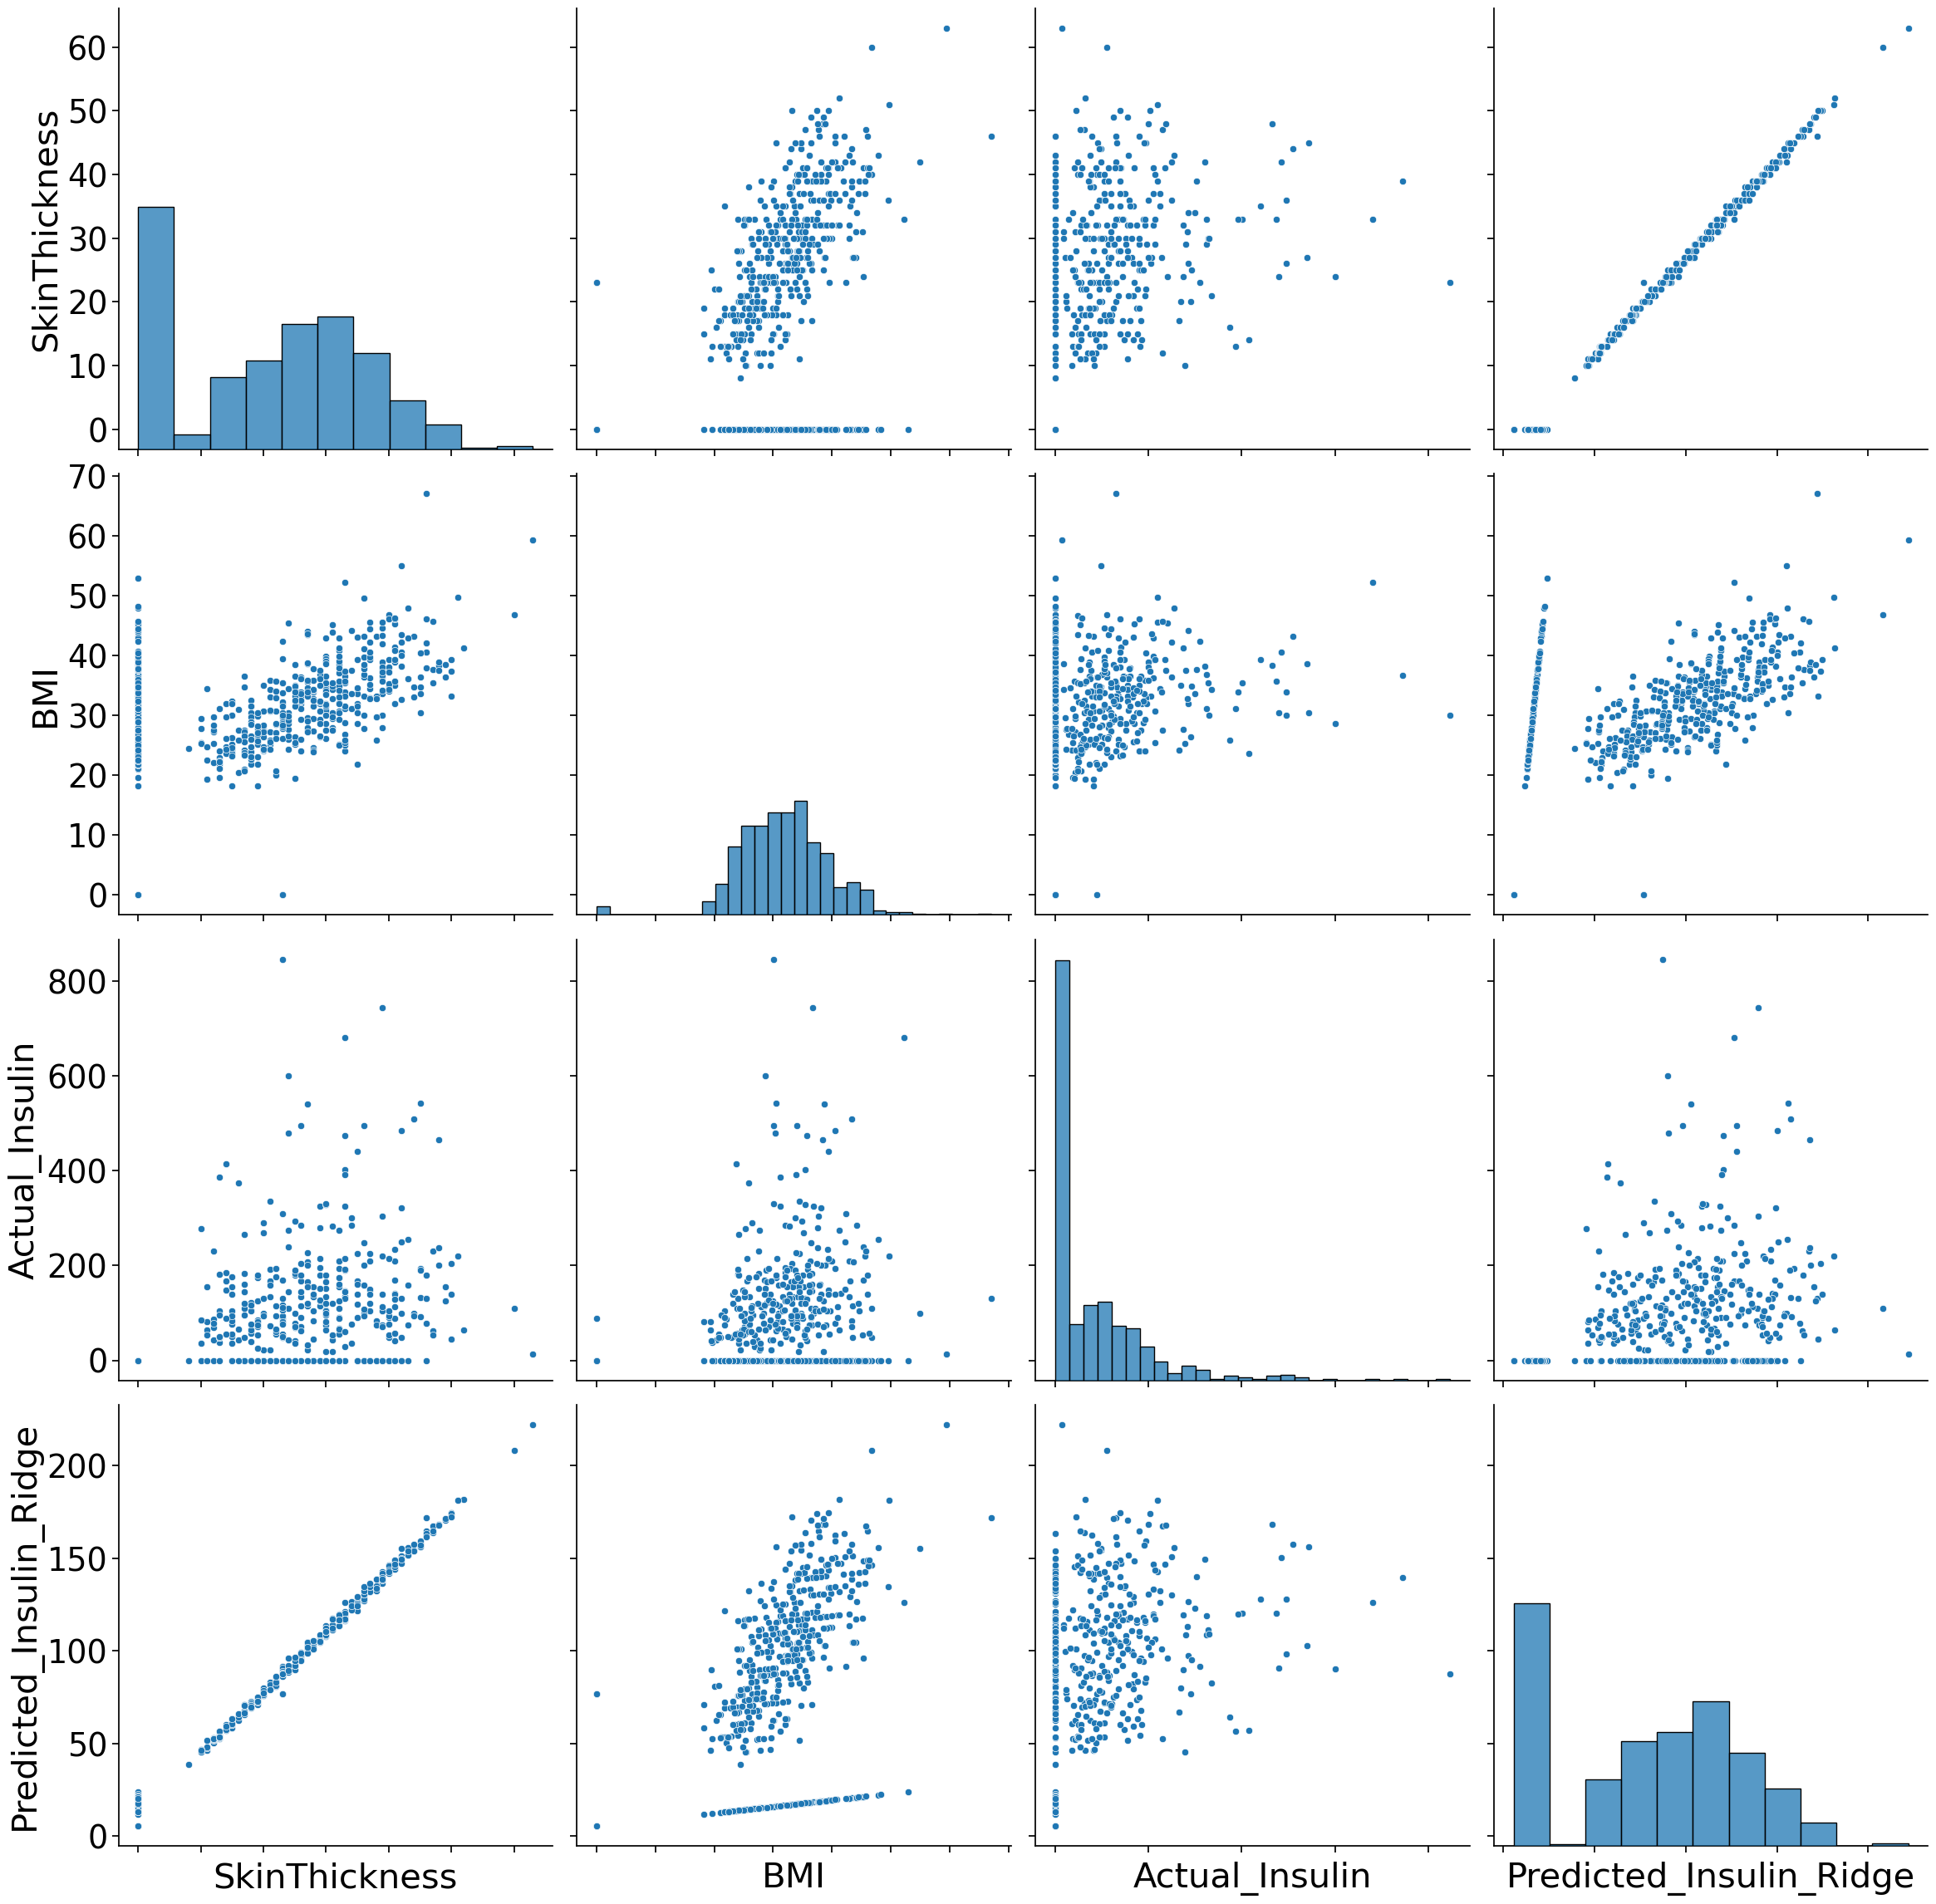

In [61]:
# Добавление предсказанных значений Insulin на основе SkinThickness и BMI для Ridge-регрессии
Y_pred_ridge = ridge_regression.predict(X_pred)

# Создание нового DataFrame с фактическими и предсказанными значениями Insulin для Ridge-регрессии
scatter_data["Predicted_Insulin_Ridge"] = Y_pred_ridge

# Создание матрицы рассеяния
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(scatter_data[["SkinThickness", "BMI", "Actual_Insulin", "Predicted_Insulin_Ridge"]], 
                     palette="tab20", height=6)
    g.set(xticklabels=[])

plt.show()

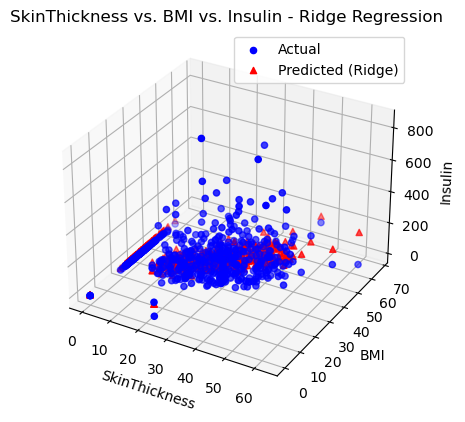

In [62]:
# Построение 3D-графика для Ridge-регрессии
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Actual_Insulin"], 
           c=colors["Actual"], marker=markers["Actual"], label="Actual")
ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Predicted_Insulin_Ridge"], 
           c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Ridge)")

ax.set_xlabel("SkinThickness")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("SkinThickness vs. BMI vs. Insulin - Ridge Regression")
ax.legend()
plt.show()

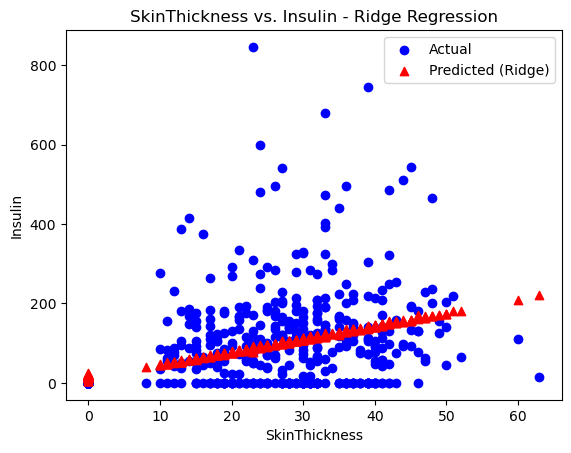

In [63]:

# Построение 2D-графика для Ridge-регрессии
plt.scatter(scatter_data["SkinThickness"], scatter_data["Actual_Insulin"], 
            c=colors["Actual"], marker=markers["Actual"], label="Actual")
plt.scatter(scatter_data["SkinThickness"], scatter_data["Predicted_Insulin_Ridge"], 
            c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Ridge)")

plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.title("SkinThickness vs. Insulin - Ridge Regression")
plt.legend()
plt.show()

**Постройте модель ElasticNet регрессии для атрибутов X ={SkinThickness, BMI} и Y = {Insulin} из датасета - diabetes.csv. Укажите score модели**

In [65]:
from sklearn.linear_model import ElasticNet

# Создание и обучение ElasticNet-регрессии
elastic_net_regression = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_regression.fit(X_train.values, Y_train.values)

# Предсказание результатов для тестовых данных
Y_pred_elastic_net = elastic_net_regression.predict(X_test.values)

# Вычисление score для ElasticNet-регрессии
elastic_net_score = r2_score(Y_test, Y_pred_elastic_net)

print(f"ElasticNet Regression score: {elastic_net_score}")

ElasticNet Regression score: 0.23560123548709233


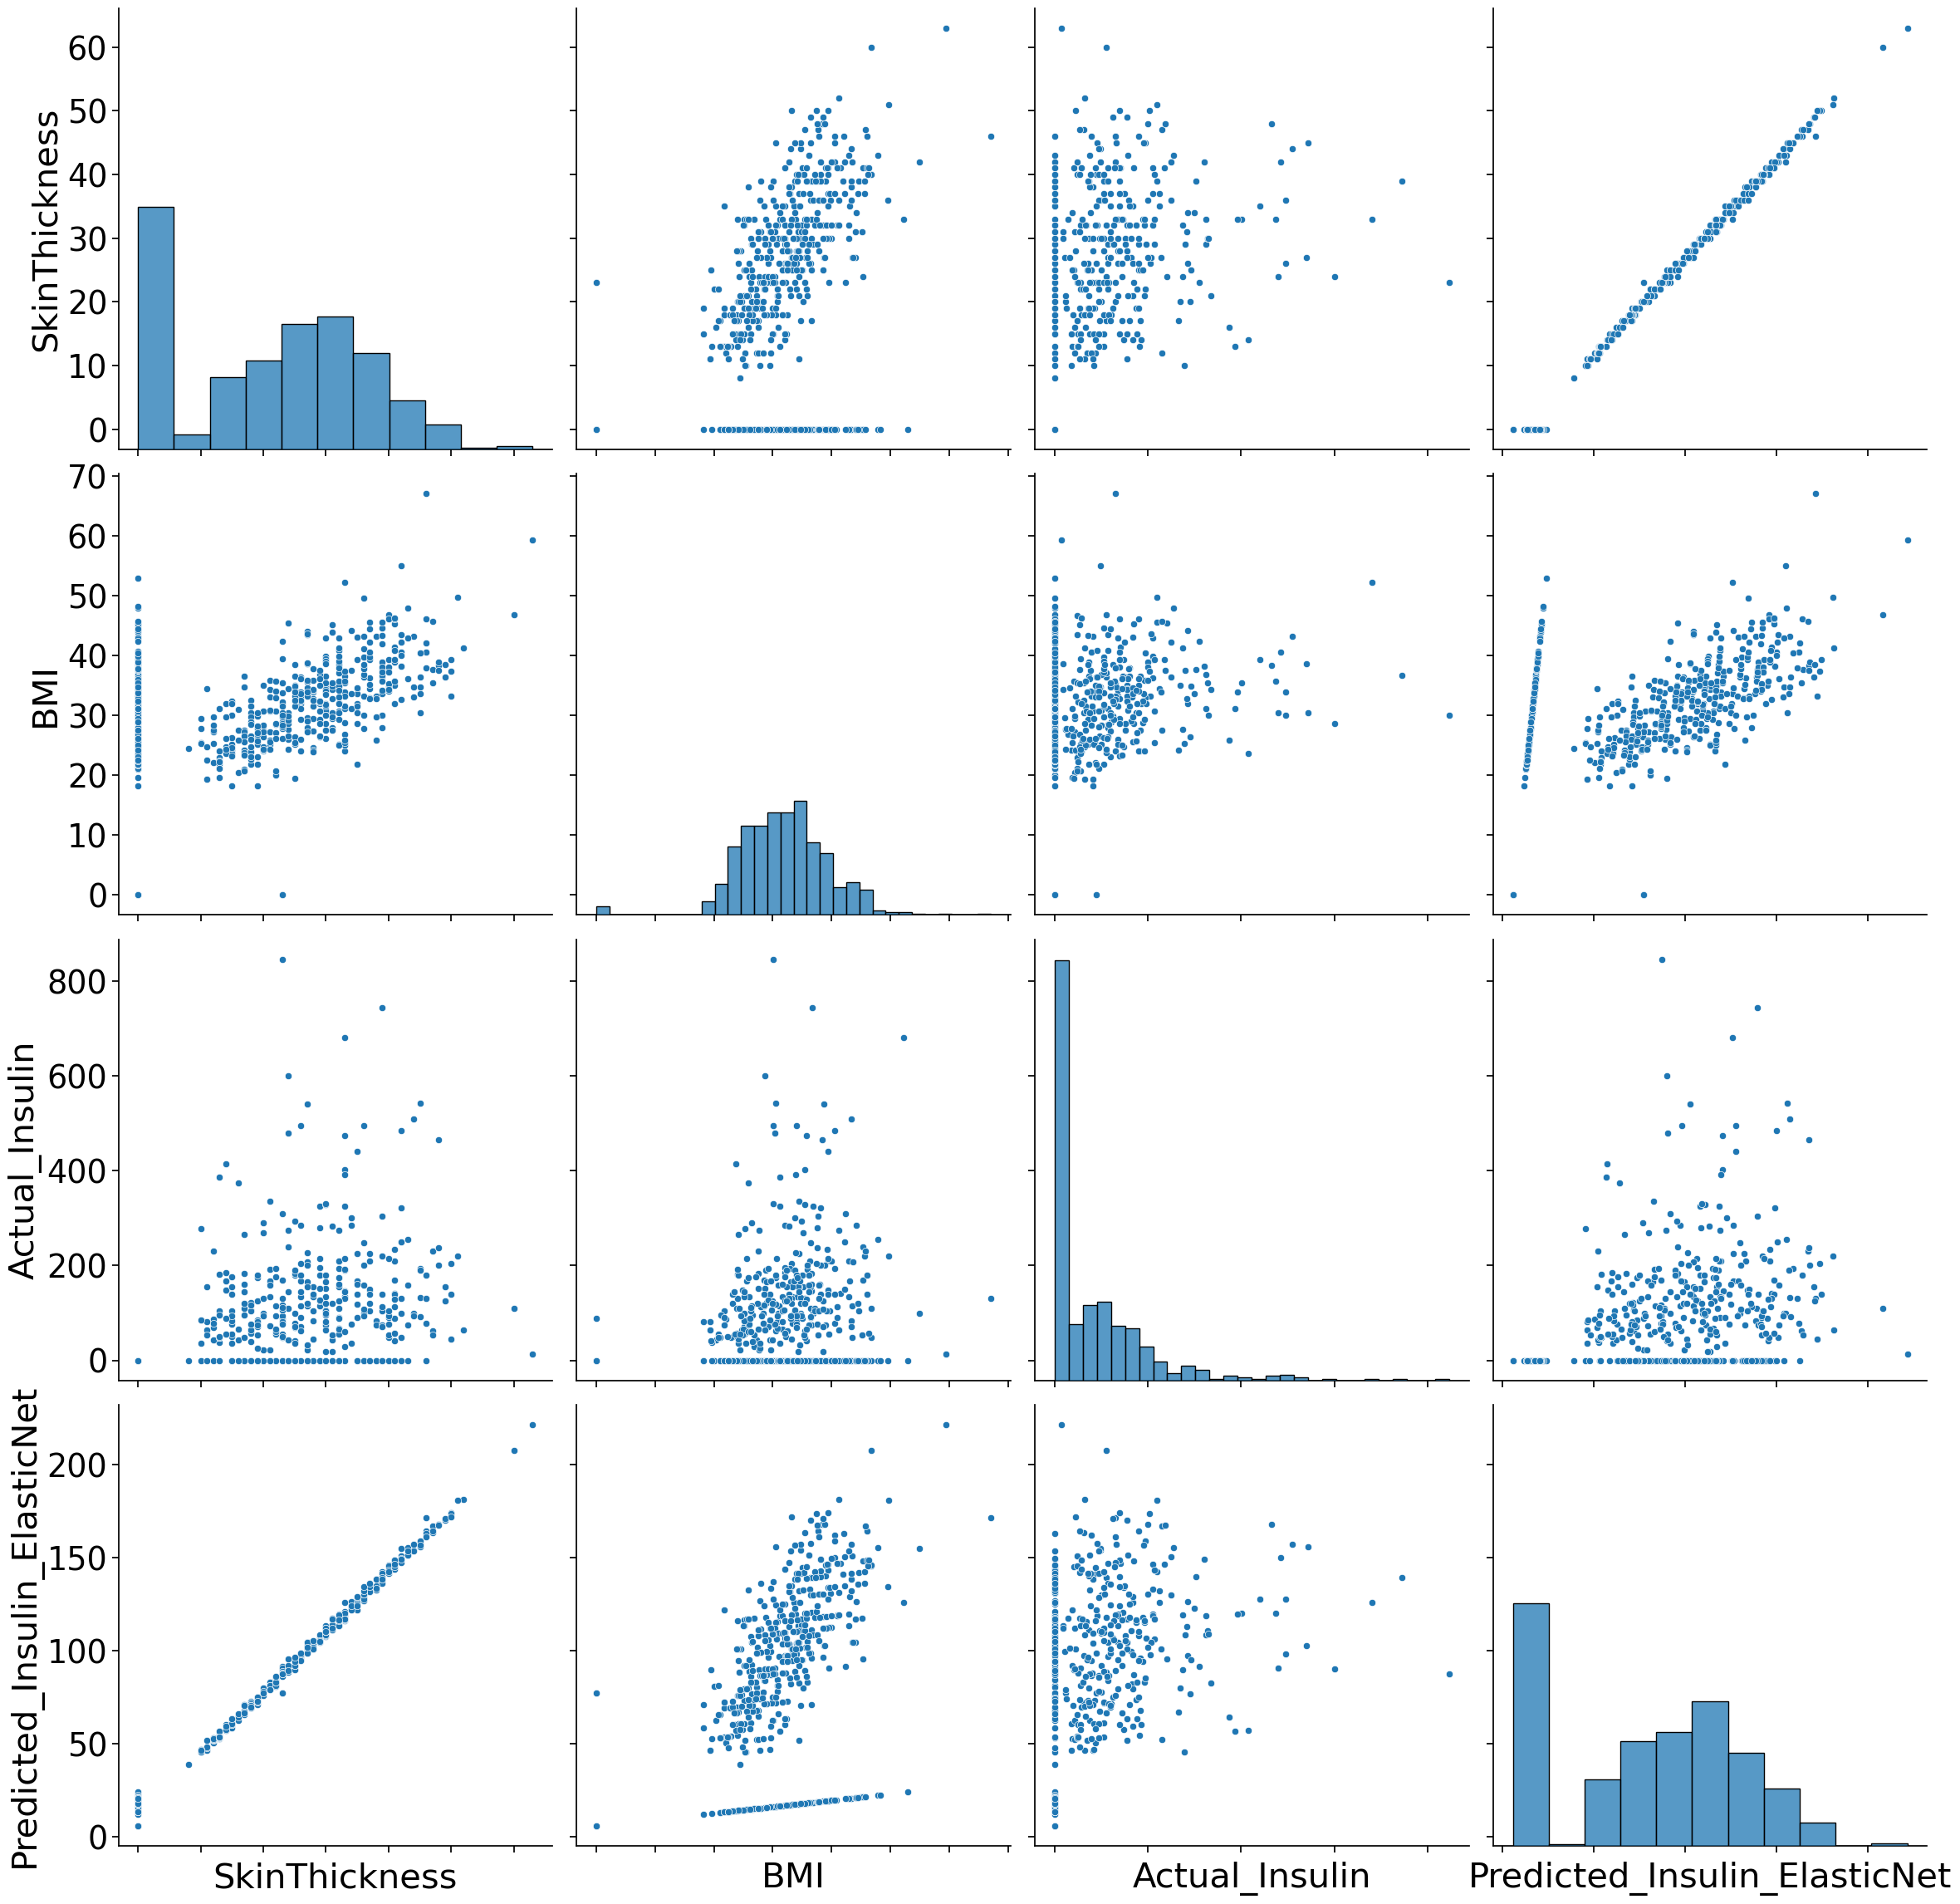

In [67]:
# Добавление предсказанных значений Insulin на основе SkinThickness и BMI для ElasticNet-регрессии
Y_pred_elastic_net = elastic_net_regression.predict(X_pred)

# Создание нового DataFrame с фактическими и предсказанными значениями Insulin для ElasticNet-регрессии
scatter_data["Predicted_Insulin_ElasticNet"] = Y_pred_elastic_net

# Создание матрицы рассеяния для ElasticNet-регрессии
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(scatter_data[["SkinThickness", "BMI", "Actual_Insulin", "Predicted_Insulin_ElasticNet"]], 
                     palette="tab20", height=6)
    g.set(xticklabels=[])

plt.show()

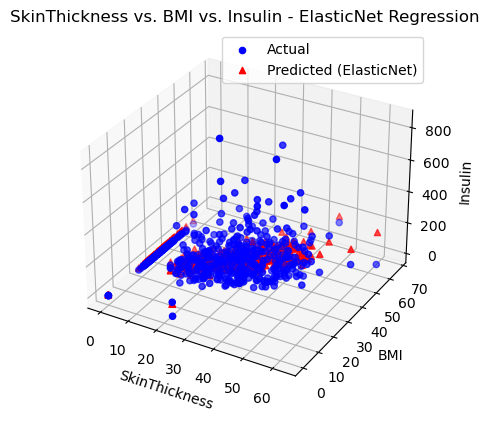

In [70]:
# Построение 3D-графика для ElasticNet-регрессии
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Actual_Insulin"], 
           c=colors["Actual"], marker=markers["Actual"], label="Actual")
ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Predicted_Insulin_ElasticNet"], 
           c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (ElasticNet)")

ax.set_xlabel("SkinThickness")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("SkinThickness vs. BMI vs. Insulin - ElasticNet Regression")
ax.legend()
plt.show()

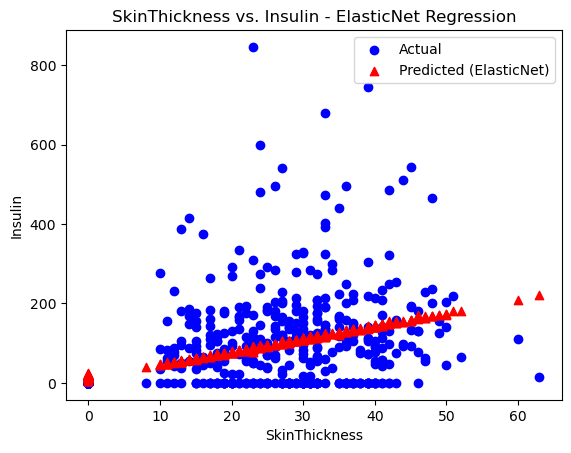

In [72]:
# Построение 2D-графика для ElasticNet-регрессии
plt.scatter(scatter_data["SkinThickness"], scatter_data["Actual_Insulin"], 
            c=colors["Actual"], marker=markers["Actual"], label="Actual")
plt.scatter(scatter_data["SkinThickness"], scatter_data["Predicted_Insulin_ElasticNet"], 
            c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (ElasticNet)")

plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.title("SkinThickness vs. Insulin - ElasticNet Regression")
plt.legend()
plt.show()

**Постройте модель Polynom регрессия (для степени полинома 2) регрессии для атрибутов X ={SkinThickness, BMI} и Y = {Insulin} из датасета - diabetes.csv. Укажите score модели**

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Создание полиномиальных признаков степени 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Создание и обучение полиномиальной регрессии
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, Y_train)

# Предсказание результатов для тестовых данных
Y_pred_poly = poly_regression.predict(X_test_poly)

# Вычисление score для полиномиальной регрессии
poly_score = r2_score(Y_test, Y_pred_poly)

print(f"Polynomial Regression (degree 2) score: {poly_score}")

Polynomial Regression (degree 2) score: 0.19850987521509833


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


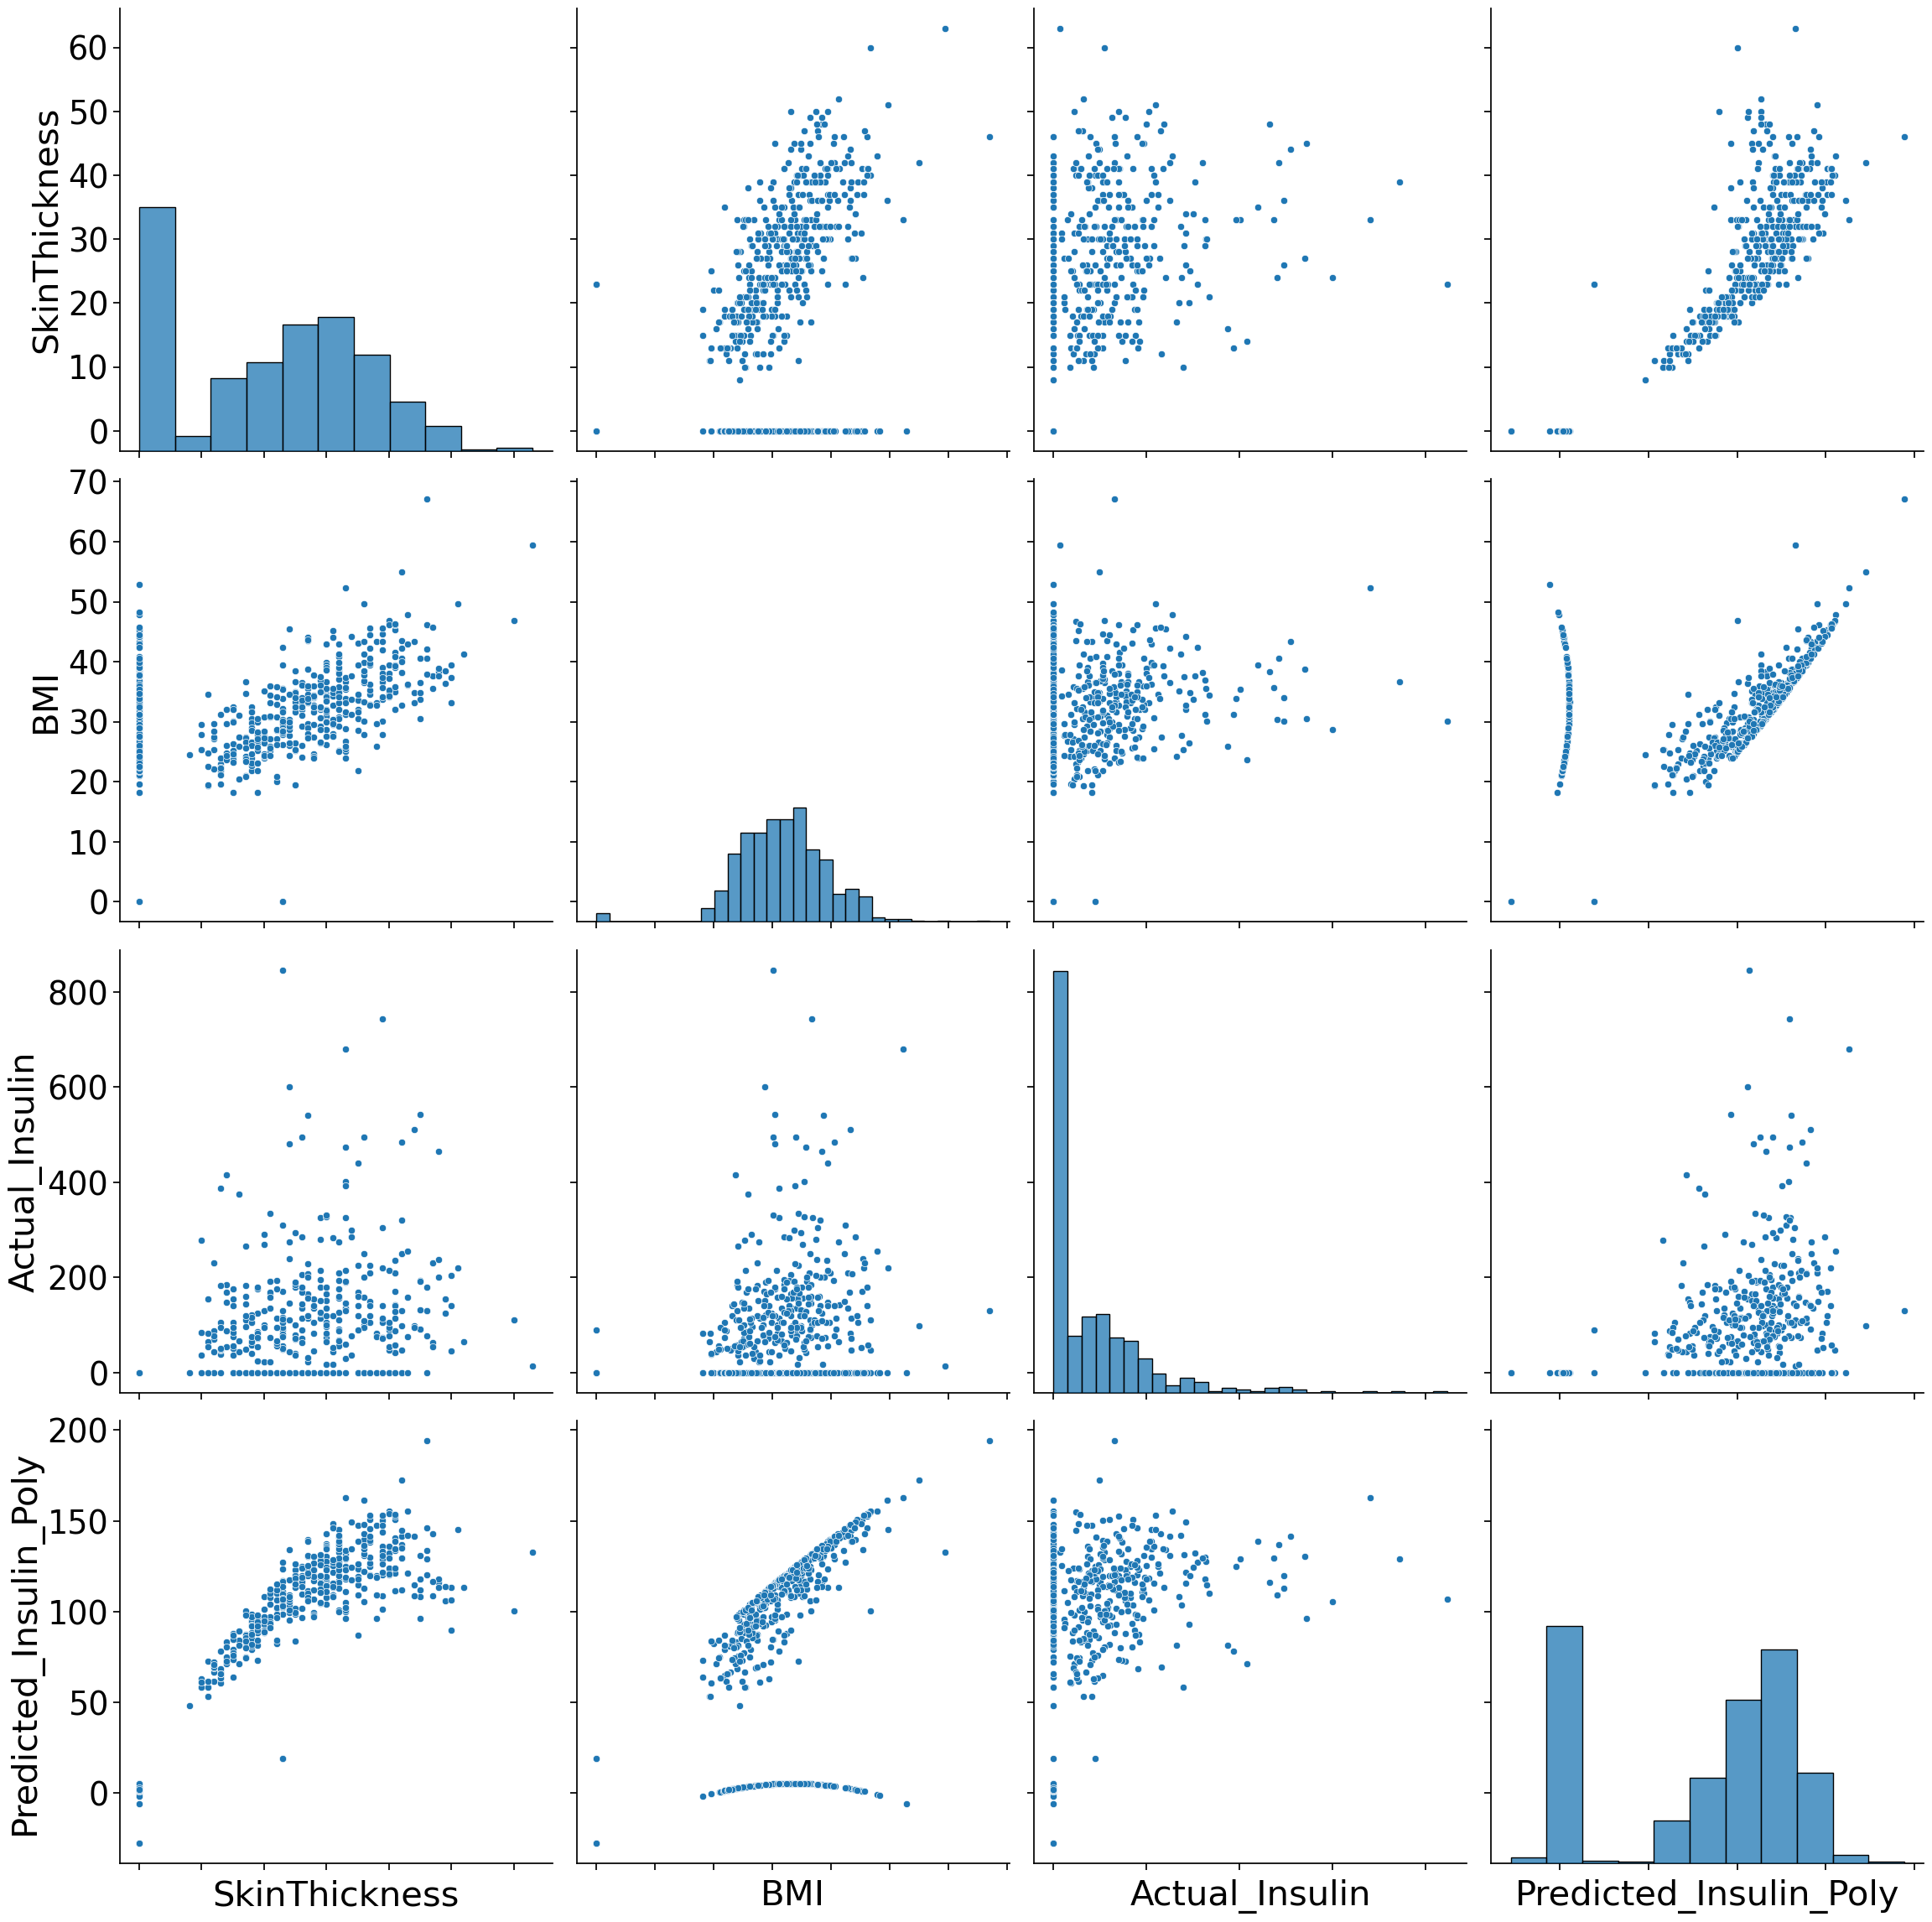

In [85]:
# Добавление предсказанных значений Insulin на основе SkinThickness и BMI для полиномиальной регрессии
Y_pred_poly = poly_regression.predict(poly_features.transform(X_pred))

# Создание нового DataFrame с фактическими и предсказанными значениями Insulin для полиномиальной регрессии
scatter_data["Predicted_Insulin_Poly"] = Y_pred_poly

# Создание матрицы рассеяния для полиномиальной регрессии
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(scatter_data[["SkinThickness", "BMI", "Actual_Insulin", "Predicted_Insulin_Poly"]], 
                     palette="tab20", height=6)
    g.set(xticklabels=[])

plt.show()

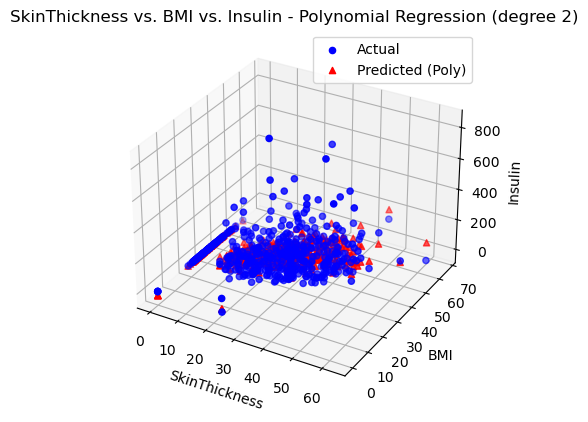

In [86]:
# Построение 3D-графика для полиномиальной регрессии
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Actual_Insulin"], 
           c=colors["Actual"], marker=markers["Actual"], label="Actual")
ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Predicted_Insulin_Poly"], 
           c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Poly)")

ax.set_xlabel("SkinThickness")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("SkinThickness vs. BMI vs. Insulin - Polynomial Regression (degree 2)")
ax.legend()
plt.show()

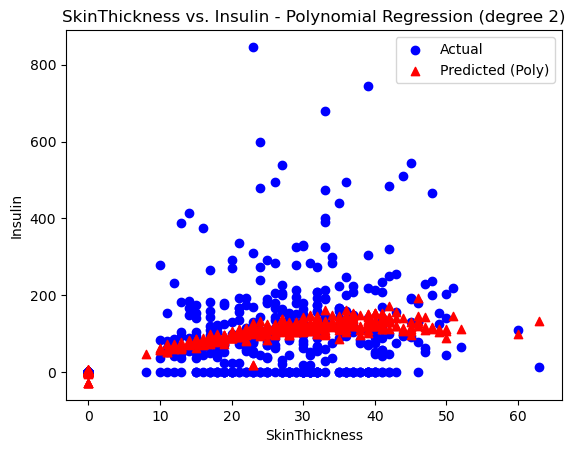

In [87]:
# Построение 2D-графика для полиномиальной регрессии
plt.scatter(scatter_data["SkinThickness"], scatter_data["Actual_Insulin"], 
            c=colors["Actual"], marker=markers["Actual"], label="Actual")
plt.scatter(scatter_data["SkinThickness"], scatter_data["Predicted_Insulin_Poly"], 
            c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Poly)")

plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.title("SkinThickness vs. Insulin - Polynomial Regression (degree 2)")
plt.legend()
plt.show()

**Постройте модель Polynom регрессия (для степени полинома 5) регрессии для атрибутов X ={SkinThickness, BMI} и Y = {Insulin} из датасета - diabetes.csv. Укажите score модели**

In [88]:
# Создание полиномиальных признаков степени 5
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly_5 = poly_features_5.fit_transform(X_train)
X_test_poly_5 = poly_features_5.transform(X_test)

# Создание и обучение полиномиальной регрессии
poly_regression_5 = LinearRegression()
poly_regression_5.fit(X_train_poly_5, Y_train)

# Предсказание результатов для тестовых данных
Y_pred_poly_5 = poly_regression_5.predict(X_test_poly_5)

# Вычисление score для полиномиальной регрессии
poly_score_5 = r2_score(Y_test, Y_pred_poly_5)

print(f"Polynomial Regression (degree 5) score: {poly_score_5}")

Polynomial Regression (degree 5) score: -479.2454281465556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


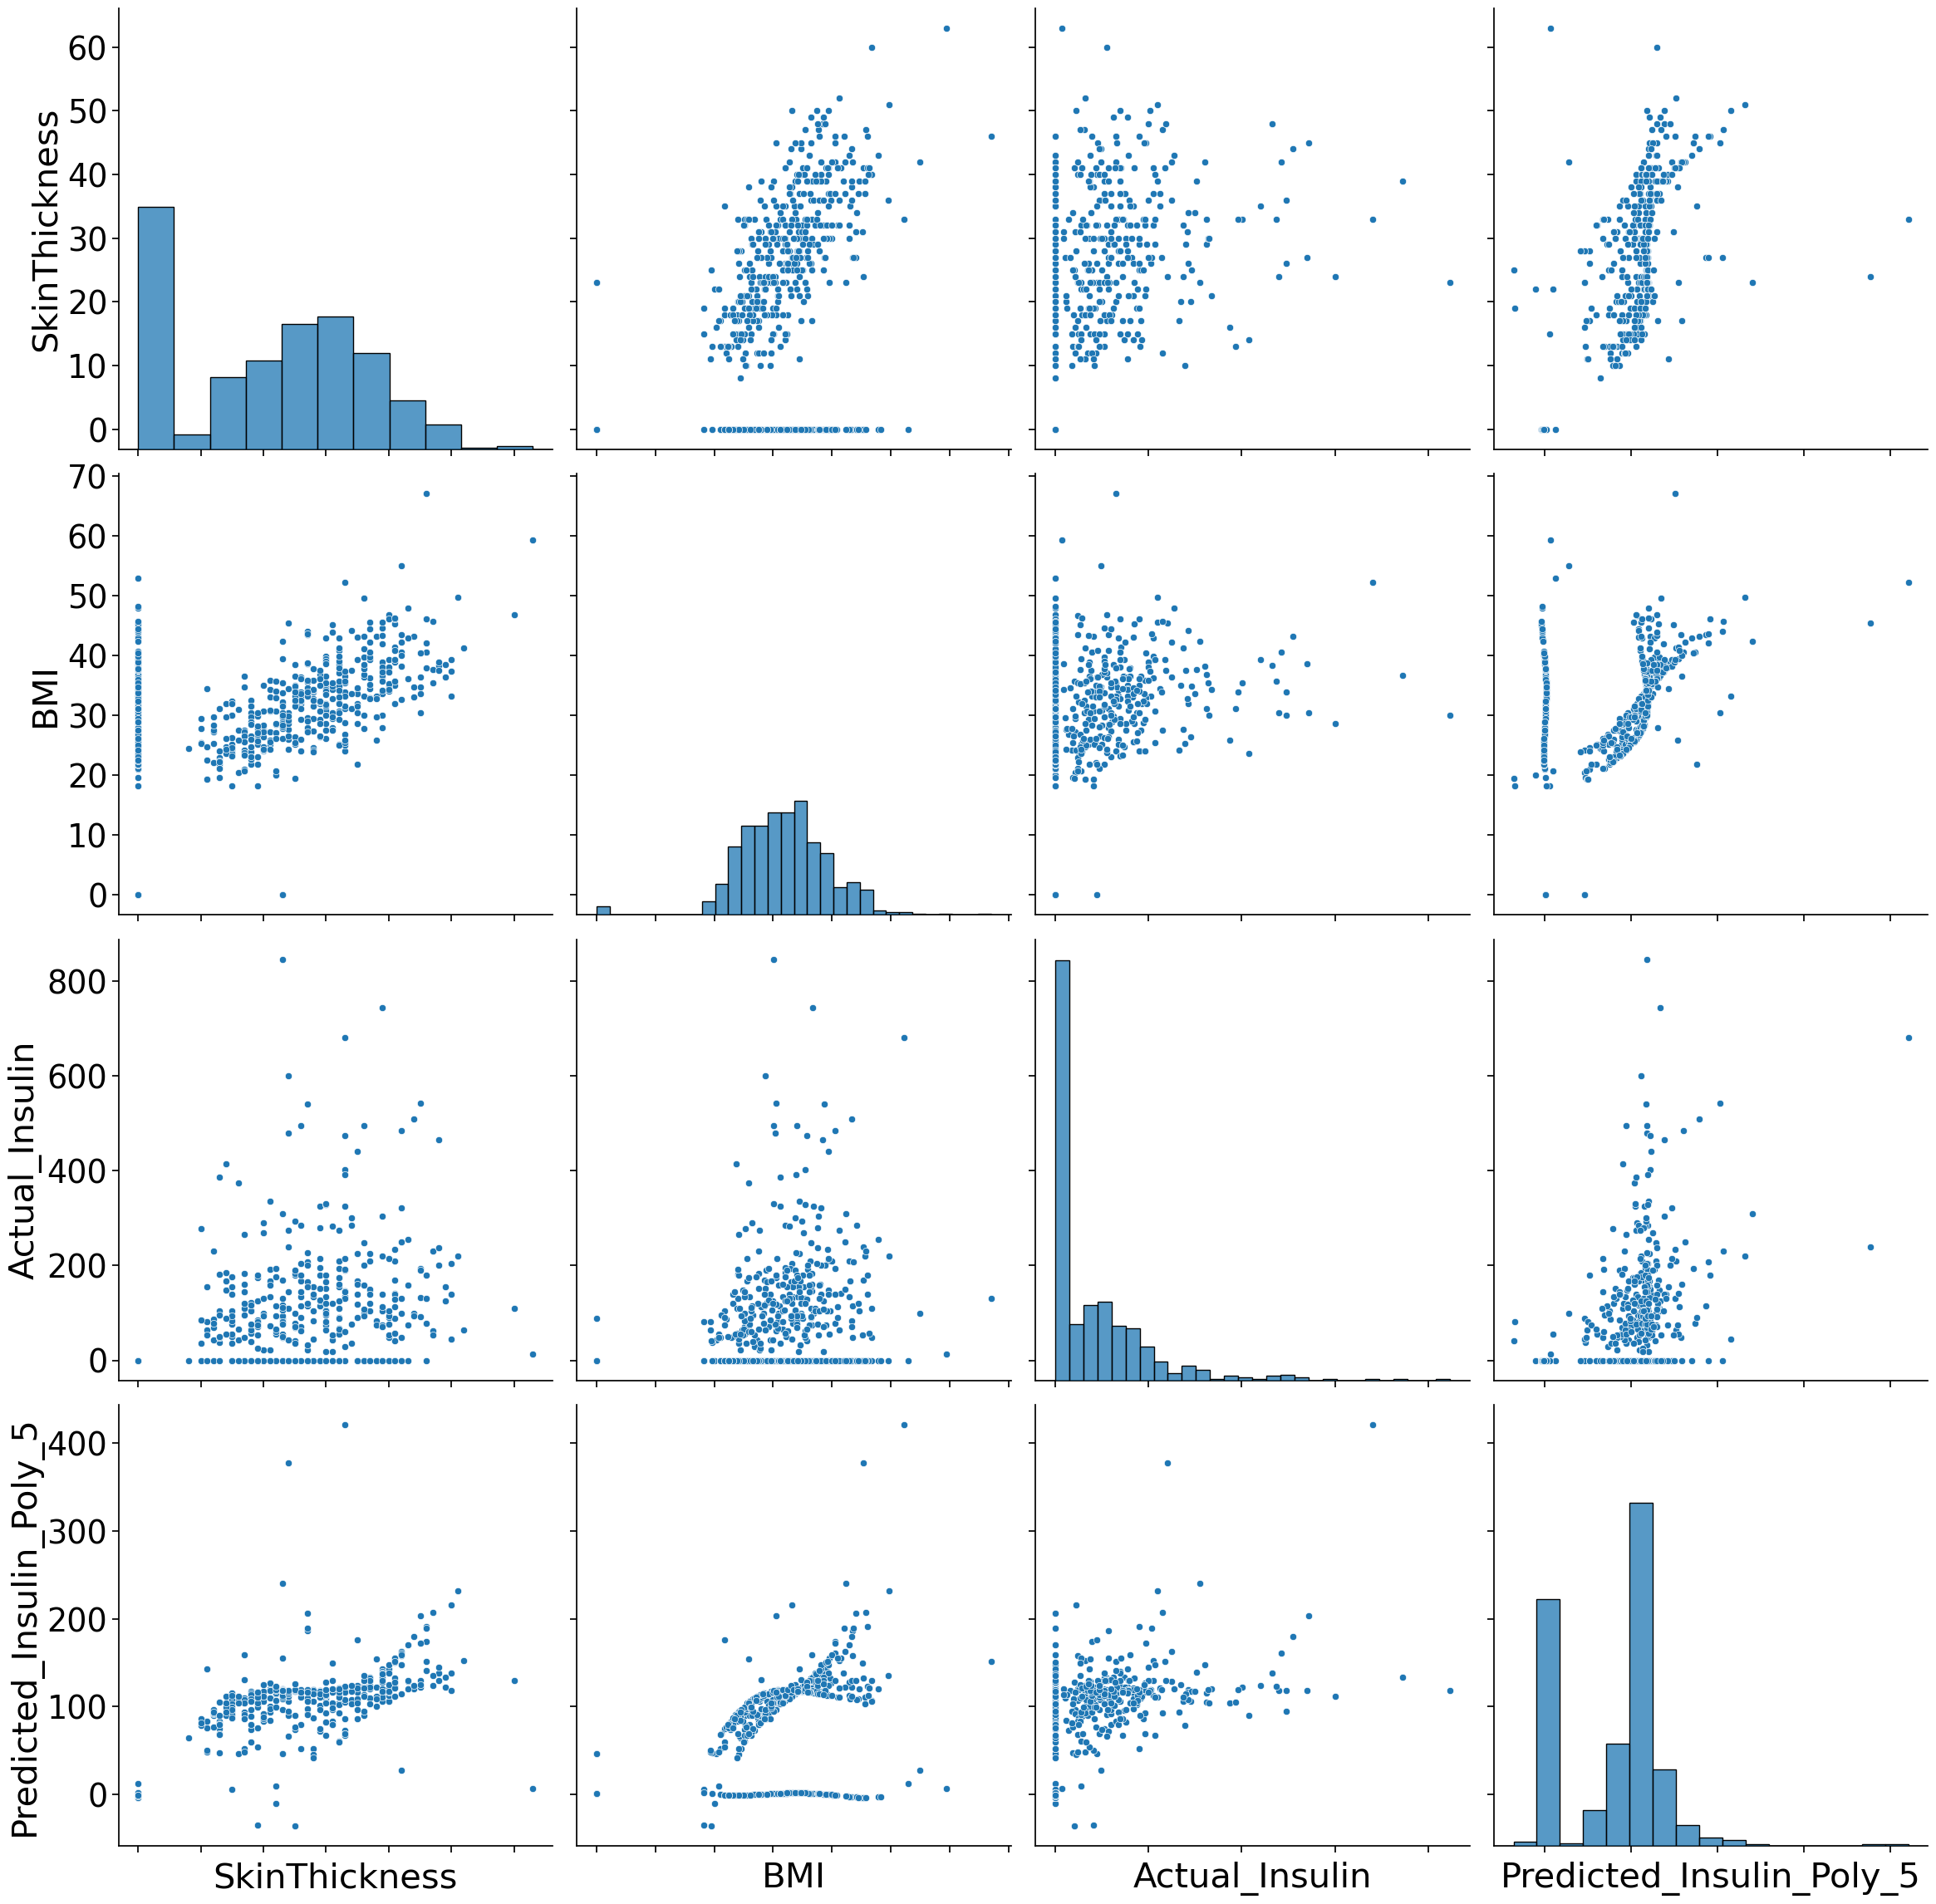

In [90]:
# Добавление предсказанных значений Insulin на основе SkinThickness и BMI для полиномиальной регрессии
Y_pred_poly_5 = poly_regression_5.predict(poly_features_5.transform(X_pred))

# Создание нового DataFrame с фактическими и предсказанными значениями Insulin для полиномиальной регрессии
scatter_data["Predicted_Insulin_Poly_5"] = Y_pred_poly_5

# Создание матрицы рассеяния для полиномиальной регрессии
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(scatter_data[["SkinThickness", "BMI", "Actual_Insulin", "Predicted_Insulin_Poly_5"]], 
                     palette="tab20", height=6)
    g.set(xticklabels=[])

plt.show()

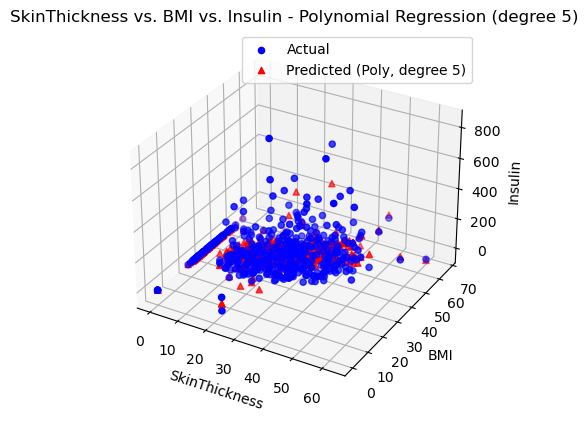

In [91]:
# Построение 3D-графика для полиномиальной регрессии
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Actual_Insulin"], 
           c=colors["Actual"], marker=markers["Actual"], label="Actual")
ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Predicted_Insulin_Poly_5"], 
           c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Poly, degree 5)")

ax.set_xlabel("SkinThickness")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("SkinThickness vs. BMI vs. Insulin - Polynomial Regression (degree 5)")
ax.legend()
plt.show()

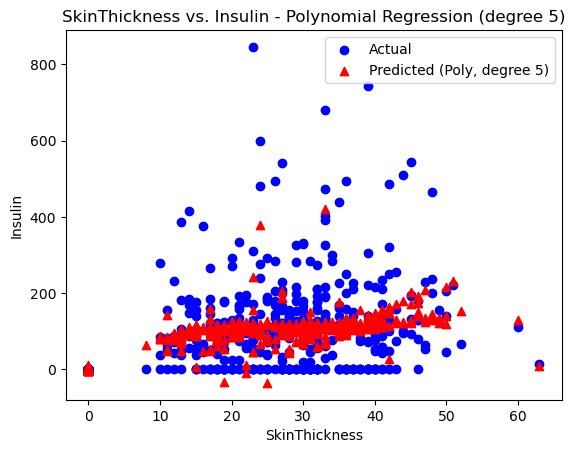

In [92]:
# Построение 2D-графика для полиномиальной регрессии
plt.scatter(scatter_data["SkinThickness"], scatter_data["Actual_Insulin"], 
            c=colors["Actual"], marker=markers["Actual"], label="Actual")
plt.scatter(scatter_data["SkinThickness"], scatter_data["Predicted_Insulin_Poly_5"], 
            c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Poly, degree 5)")

plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.title("SkinThickness vs. Insulin - Polynomial Regression (degree 5)")
plt.legend()
plt.show()

**Постройте модель Polynom регрессия (для степени полинома 10) регрессии для атрибутов X ={SkinThickness, BMI} и Y = {Insulin} из датасета - diabetes.csv. Укажите score модели**

In [93]:
# Создание полиномиальных признаков степени 10
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Создание и обучение полиномиальной регрессии
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, Y_train)

# Предсказание результатов для тестовых данных
Y_pred_poly = poly_regression.predict(X_test_poly)

# Вычисление score для полиномиальной регрессии
poly_score = r2_score(Y_test, Y_pred_poly)

print(f"Polynomial Regression (degree 10) score: {poly_score}")


Polynomial Regression (degree 10) score: -730286145311.0321


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


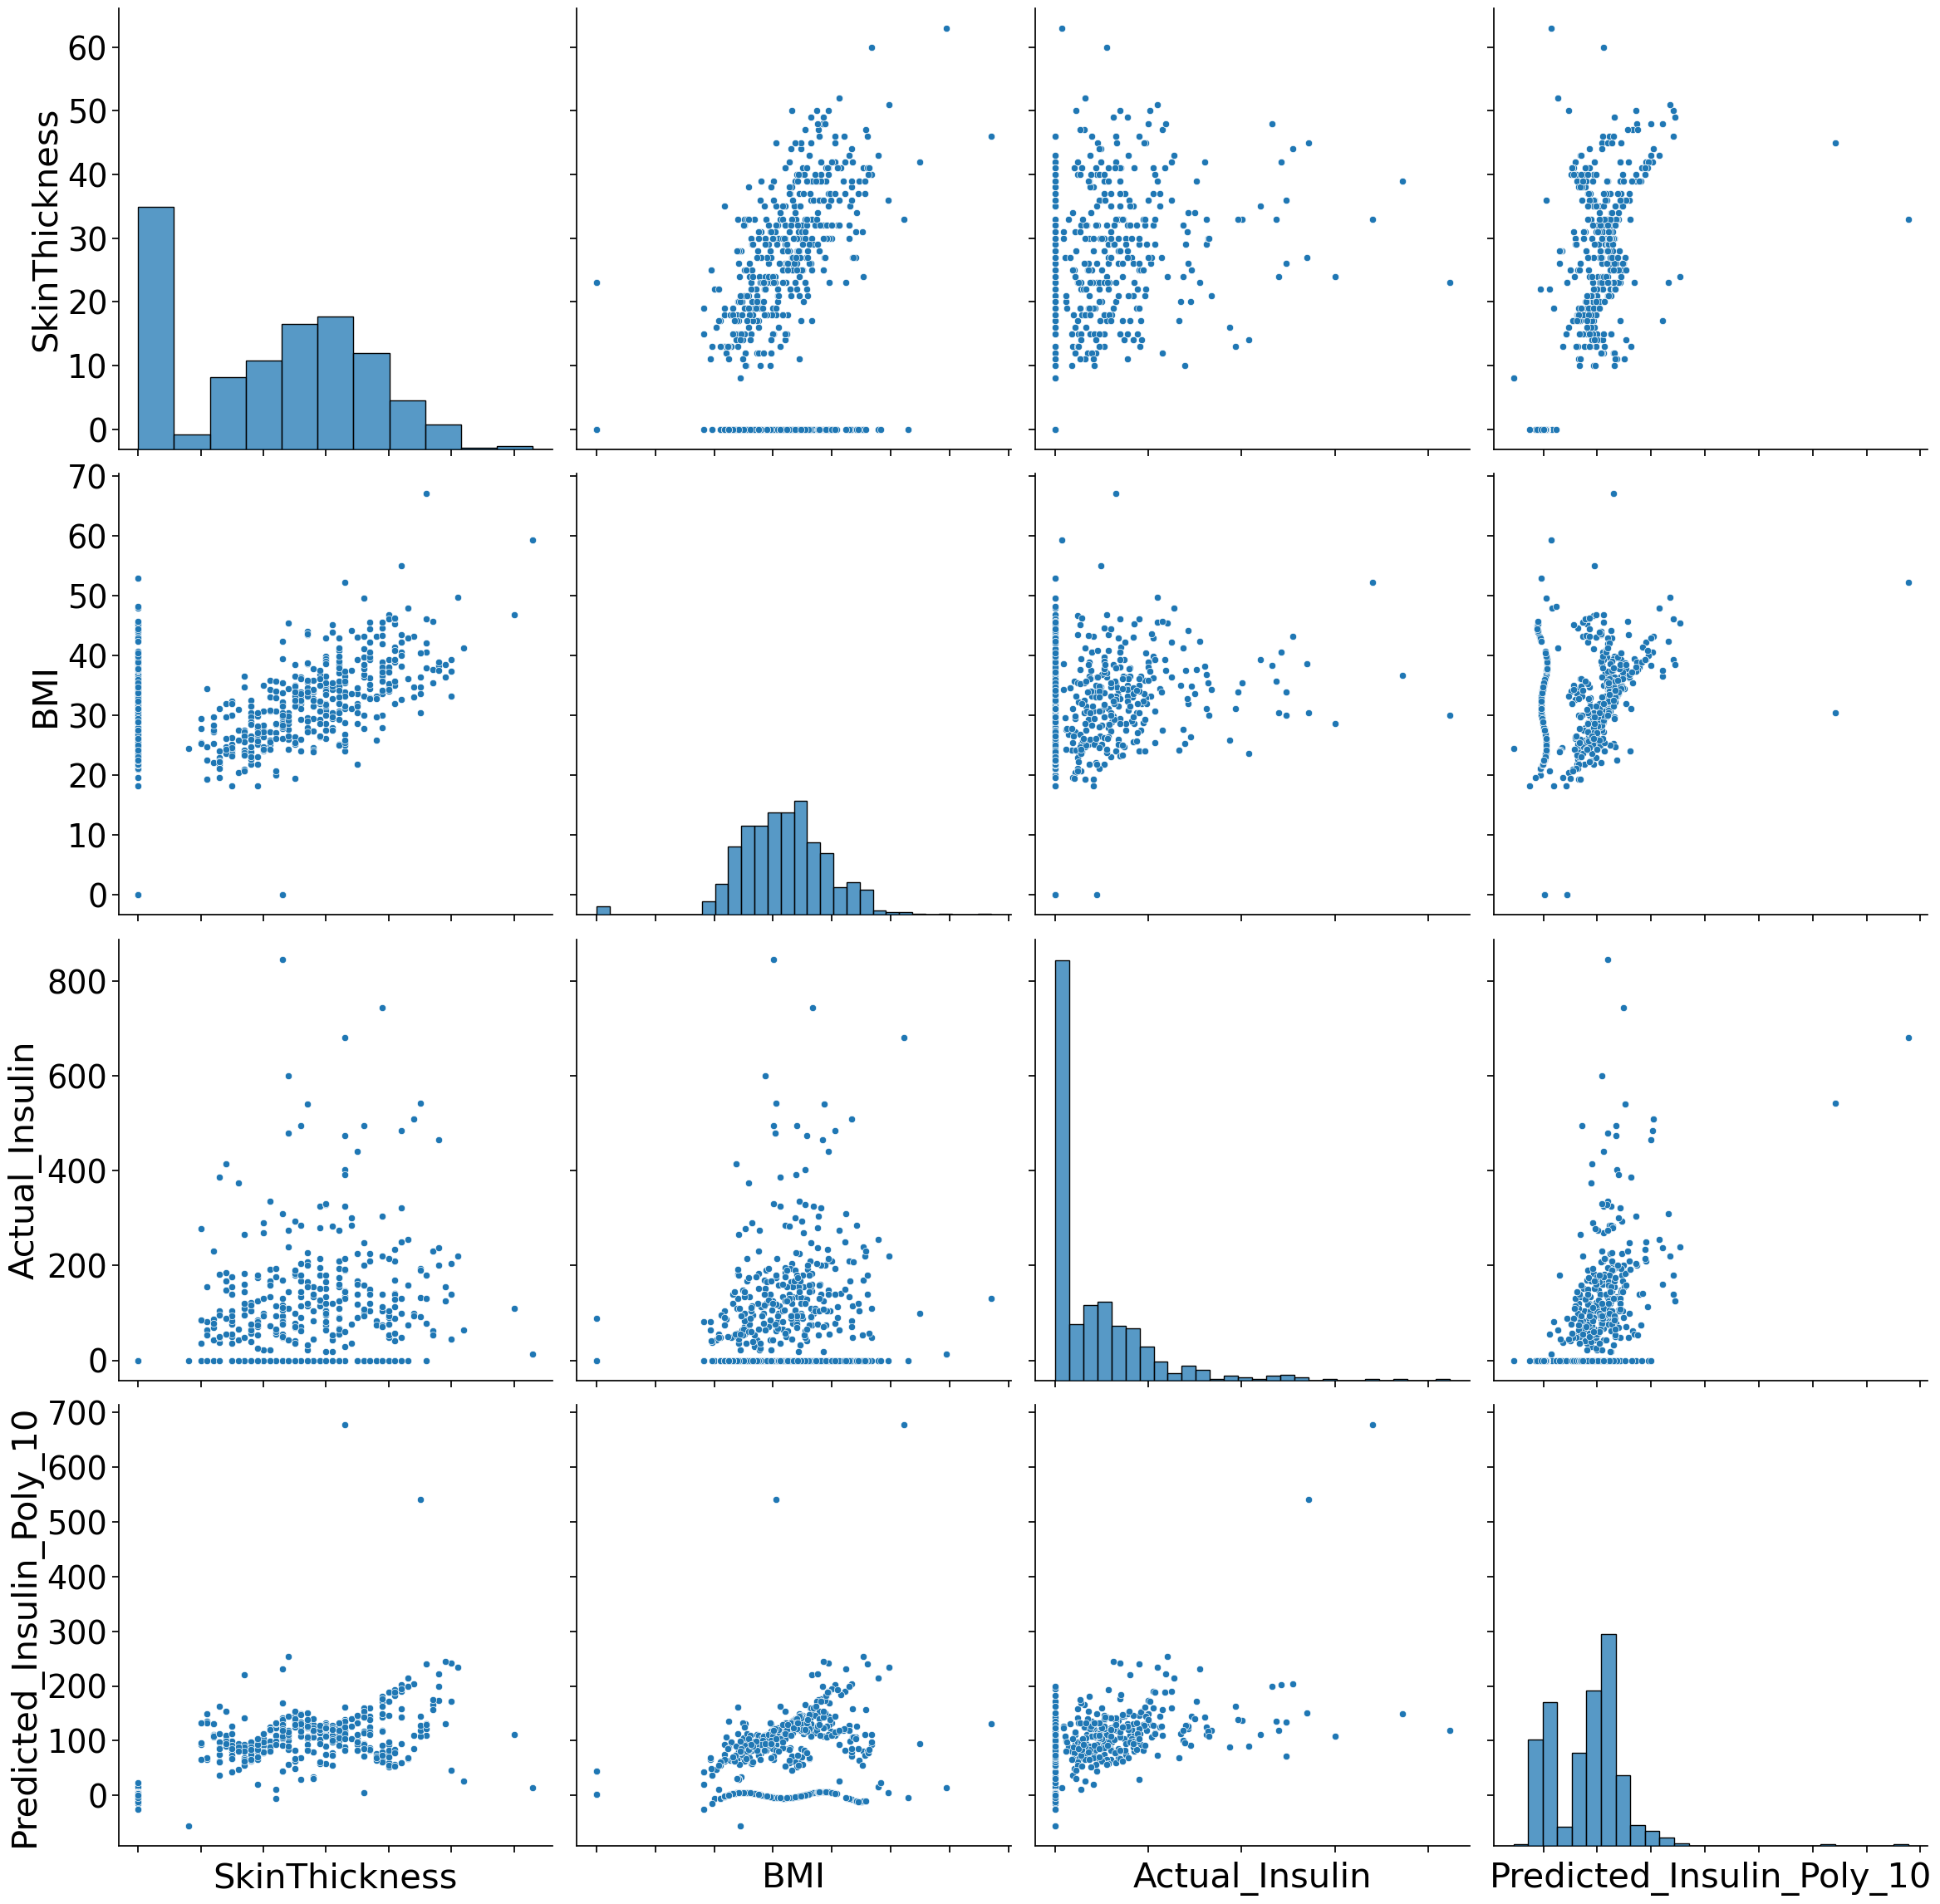

In [94]:
# Добавление предсказанных значений Insulin на основе SkinThickness и BMI для полиномиальной регрессии
Y_pred_poly = poly_regression.predict(poly_features.transform(X_pred))

# Создание нового DataFrame с фактическими и предсказанными значениями Insulin для полиномиальной регрессии
scatter_data["Predicted_Insulin_Poly_10"] = Y_pred_poly

# Создание матрицы рассеяния для полиномиальной регрессии
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(scatter_data[["SkinThickness", "BMI", "Actual_Insulin", "Predicted_Insulin_Poly_10"]], 
                     palette="tab20", height=6)
    g.set(xticklabels=[])

plt.show()

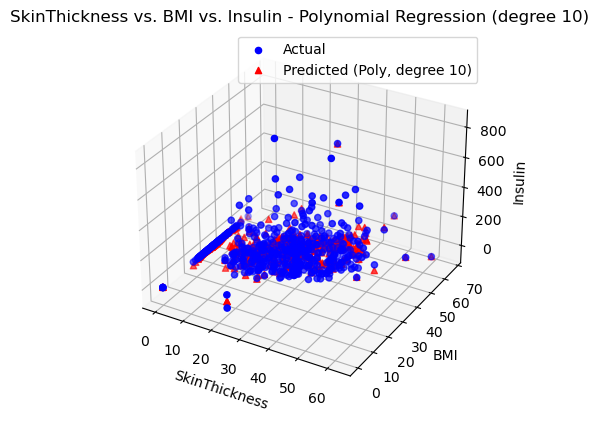

In [95]:
# Построение 3D-графика для полиномиальной регрессии
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Actual_Insulin"], 
           c=colors["Actual"], marker=markers["Actual"], label="Actual")
ax.scatter(scatter_data["SkinThickness"], scatter_data["BMI"], scatter_data["Predicted_Insulin_Poly_10"], 
           c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Poly, degree 10)")

ax.set_xlabel("SkinThickness")
ax.set_ylabel("BMI")
ax.set_zlabel("Insulin")
ax.set_title("SkinThickness vs. BMI vs. Insulin - Polynomial Regression (degree 10)")
ax.legend()
plt.show()

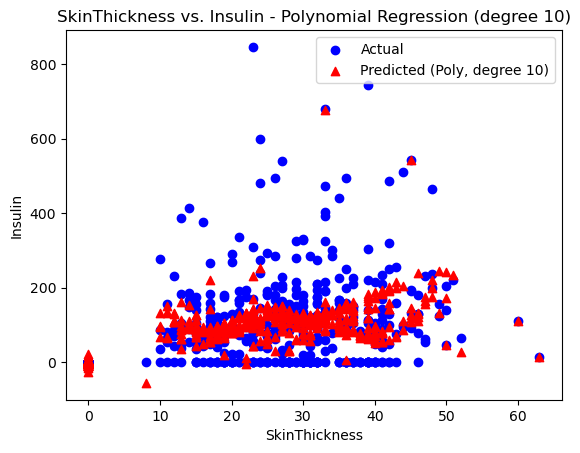

In [96]:
# Построение 2D-графика для полиномиальной регрессии
plt.scatter(scatter_data["SkinThickness"], scatter_data["Actual_Insulin"], 
            c=colors["Actual"], marker=markers["Actual"], label="Actual")
plt.scatter(scatter_data["SkinThickness"], scatter_data["Predicted_Insulin_Poly_10"], 
            c=colors["Predicted"], marker=markers["Predicted"], label="Predicted (Poly, degree 10)")

plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.title("SkinThickness vs. Insulin - Polynomial Regression (degree 10)")
plt.legend()
plt.show()